# Import data and packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
import umap
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

RNA = pd.read_csv("data/2.RNA-Seq data.CSV", sep=";")
RNA_Bcells = pd.read_csv("data/RNA_Bcells.csv", index_col=0)

c:\Users\Celine\anaconda\envs\envBCells1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Information about the data


In [2]:
RNA.head()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,0610005C13Rik,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,0610007P14Rik,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,0610009B22Rik,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,0610009L18Rik,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,0610009O20Rik,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [3]:
RNA.shape

(17535, 87)

In [4]:
RNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             17535 non-null  object
 1   LTHSC.34-.BM           17535 non-null  object
 2   LTHSC.34+.BM           17535 non-null  object
 3   STHSC.150-.BM          17535 non-null  object
 4   MPP4.135+.BM           17535 non-null  object
 5   proB.CLP.BM            17535 non-null  object
 6   proB.FrA.BM            17535 non-null  object
 7   proB.FrBC.BM           17535 non-null  object
 8   B.FrE.BM               17535 non-null  object
 9   B1b.PC                 17535 non-null  object
 10  B.T1.Sp                17535 non-null  object
 11  B.T2.Sp                17535 non-null  object
 12  B.T3.Sp                17535 non-null  object
 13  B.Sp                   17535 non-null  object
 14  B.Fem.Sp               17535 non-null  object
 15  B.MZ.Sp            

In [5]:
RNA.describe()

,Unnamed: 0,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
count,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535,...,17535,17535,17535,17535,17535,17535,17535,17535,17535,17535
unique,17535,9196,9235,8999,9215,9230,10597,9163,9079,8697,...,10592,10668,8961,8985,9060,9685,8787,9505,10386,10386
top,0610005C13Rik,1.020.794.861,1.021.260.412,1.021.750.097,102.181.159,1.023.170.884,1.021.346.039,1.024.461.573,1.025.832.874,1.025.543.402,...,1.025.785.014,1.025.785.014,102.181.159,1.022.766.826,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,1
freq,1,3217,3569,3322,3662,3990,3395,4278,4552,4669,...,4462,4509,3264,3565,4213,3040,2493,2684,2589,343


# Data Clean-up

In [3]:
#coloumns with numerical datas for Clustering
RNA_new = RNA.iloc[:, 1:]
RNA_new.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096.731.711,1.096.731.711,1.021.750.097,102.181.159,1.205.235.792,1.326.779.959,1.392.995.822,1.821.243.417,1.025.543.402,3.383.058.327,...,1.025.785.014,1.025.785.014,1.251.081.757,1.147.248.836,1.024.461.573,1.019.656.145,1.017.884.268,1.019.106.789,1.017.884.268,102.471.956
1,2.060.539.867,2.461.053.168,1.924.246.358,2.042.983.576,1.897.591.745,2.101.951.555,1.802.194.401,1.378.025.433,1.394.367.192,1.383.349.648,...,1.216.034.485,1.051.408.945,1.018.414.626,1.756.207.071,2.804.069.644,2.002.280.289,2.081.718.215,8.857.858.996,1.290.218.737,1.406.557.627
2,7.827.205.873,7.883.703.048,6.884.475.073,7.641.816.858,1.060.856.192,7.750.281.723,6.821.309.233,572.244.261,5.678.748.898,4.046.050.707,...,8.869.142.564,7.342.365.579,6.888.126.843,6.081.190.673,5.657.801.548,1.003.977.658,3.737.308.029,7.388.846.835,7.719.183.095,8.424.581.587
3,857.715.947,1.679.138.572,155.115.492,1.694.735.423,1.058.370.366,8.664.784.443,2.878.171.712,8.952.120.008,1.187.398.402,1.672.196.819,...,6.132.817.783,8.965.889.003,4.080.444.548,1.198.740.825,5.627.218.596,4.227.672.505,2.199.351.739,1.460.089.522,2.482.515.881,1.023.994.726
4,168.645.852,1.579.260.221,1.559.416.414,1.862.614.637,1.625.845.558,1.520.880.024,1.630.722.909,1.331.160.831,8.805.298.222,8.740.847.929,...,1.025.923.988,1.471.393.233,1.309.243.541,1.075.421.425,8.833.833.033,10.077.915,8.644.240.779,1.933.071.751,1.872.127.201,4.546.488.905


In [4]:
#which columns are saved as float
float_cols = RNA_new.select_dtypes(include='float64').columns
print(float_cols)

Index([], dtype='object')


In [5]:
#which columns are saved as objects 
obj_cols = RNA_new.select_dtypes(include='object').columns
print(obj_cols)

Index(['LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'B.FrE.BM', 'B1b.PC',
       'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp', 'B.MZ.Sp',
       'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp', 'B.PC.Sp',
       'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
       'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp',
       'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.Gut', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th', 'Tgd.g2+d17.LN', 'Tgd.g2+d1.24a+.Th',
       'Tgd.g2+d1.LN', 'Tgd.g1.1+d1.24a+.Th', 'Tgd.g1.1+d1.LN', 'Tgd.Sp',
       'NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       '

In [6]:
#Remove thousand separators and convert data from object to numeric
RNA_num = RNA_new.copy()
RNA_num[obj_cols] = RNA_num[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_num.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [7]:
#Replace infinitive values with NaN
RNA_clean = RNA_num.replace([np.inf, -np.inf], np.nan).dropna()
RNA_clean.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
1,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
2,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
3,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
4,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [8]:
#Use CPM (Counts Per Million) as normalization method
cpm = RNA_num.div(RNA_num.sum(axis=0), axis=1) * 1e6
cpm.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,22.687573,22.690058,20.958102,2.263757,24.845195,27.492223,28.833200,37.383975,21.477871,68.353987,...,21.463695,21.283987,27.822406,23.470152,20.998778,21.359282,20.971594,20.931245,21.249568,2.142564
1,42.625418,50.916224,39.470073,45.260974,39.117687,43.554562,37.303078,28.286207,29.202118,27.950291,...,25.444506,21.815657,22.648196,35.928079,57.476082,41.942835,42.889895,181.929924,26.934880,29.409403
2,161.917723,163.104316,141.214107,169.299487,21.868898,160.593675,141.192220,11.746242,118.929572,81.749609,...,185.579404,152.346556,153.182843,124.407595,115.970110,21.030857,77.000214,151.758155,161.147304,176.147716
3,17.743166,34.739354,3.181723,37.545762,21.817654,179.543097,59.574407,183.756782,24.867587,33.786387,...,128.324092,186.033002,90.743697,24.523563,115.343239,88.559315,45.313512,29.988508,51.825528,21.410480
4,3.488697,32.672991,31.986694,41.265017,33.515806,31.514172,33.753841,27.324235,184.408638,176.607007,...,21.466603,30.529901,29.115847,22.000723,181.070435,0.211107,178.098348,39.703002,39.082925,95.061533


In [9]:
#log2 transformation to stabilize variance 
RNA_normalized = np.log2(cpm + 1)
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,4.566058,4.566210,4.456681,1.706534,4.691824,4.832496,4.898847,5.262432,4.490434,6.115907,...,4.489523,4.477935,4.849119,4.612951,4.459352,4.482802,4.457568,4.454916,4.475705,1.651942
1,5.447097,5.698114,5.338784,5.531724,5.326167,5.477501,5.259388,4.872149,4.916578,4.855506,...,4.724896,4.511952,4.563658,5.206646,5.869775,5.424346,5.455817,7.515147,4.803996,4.926446
2,7.348000,7.358469,7.151921,7.411930,4.515315,7.336227,7.151699,3.672000,6.906044,6.370681,...,7.543646,7.260652,7.268498,6.970481,6.869996,4.461454,6.285406,7.255106,7.341161,7.468809
3,4.228293,5.159442,2.064098,5.268500,4.512079,7.496199,5.920636,7.529484,4.693074,5.120451,...,7.014847,7.547149,6.519537,4.673758,6.862244,6.484772,5.533361,4.953661,5.723163,4.486102
4,2.166297,5.073520,5.043812,5.401392,5.109185,5.022997,5.119101,4.823965,7.534565,7.472545,...,4.489710,4.978649,4.912451,4.523607,7.508353,0.276327,7.484608,5.347063,5.324916,6.585887


In [13]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

RNA_noramlized ist the dataset we will use for the following analysis. It is the RNA-seq dataset cleaned-up and normalized.

## KMeans Clustering

In [14]:
#Number of clusters ?
K = range(1, 17)
a = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(RNA_normalized)
    a.append(kmeans.inertia_)

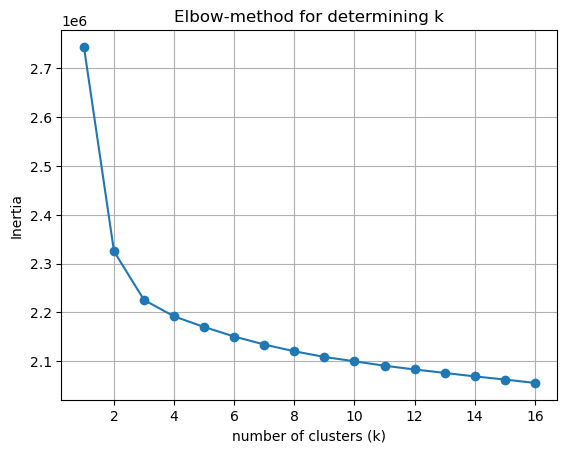

In [15]:
#Elbow-Plot für Clusteranzahl
plt.plot(K, a, marker='o')
plt.xlabel('number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow-method for determining k')
plt.grid(True)
plt.show()

There is no clear knick, so we will just look which clusternumber looks good in a plot. 

In [50]:
pca = PCA(n_components=15)
RNA_pca = pca.fit_transform(RNA_normalized)

In [92]:
kmeans_8 = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans_8.fit(RNA_normalized)

kmeans_9 = KMeans(n_clusters=9, random_state=42, n_init=10)
kmeans_9.fit(RNA_normalized)

kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_10.fit(RNA_normalized)

labels_8 = kmeans_8.labels_ + 1
labels_9 = kmeans_9.labels_ + 1
labels_10 = kmeans_10.labels_ + 1

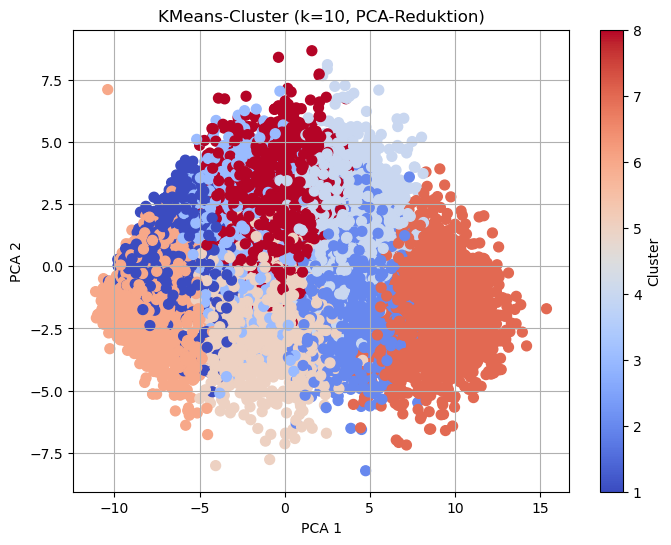

In [ ]:
#k=8
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_8, cmap='coolwarm', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=10, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

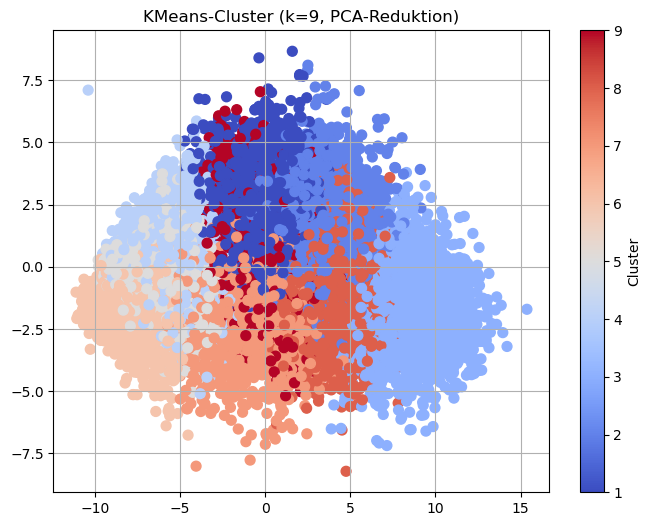

In [94]:
#für k=9
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_9, cmap='coolwarm', s=50)
plt.title('KMeans-Cluster (k=9, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

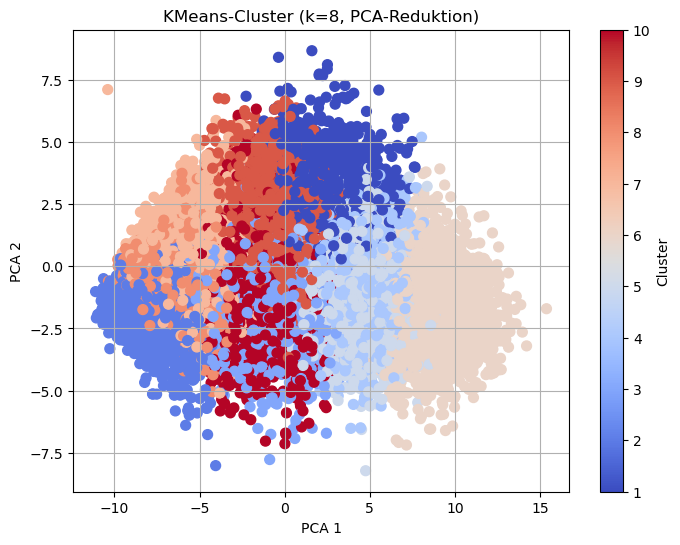

In [ ]:
#k=10
plt.figure(figsize=(8,6))
plt.scatter(RNA_pca[:, 0], RNA_pca[:, 1], c=labels_10, cmap='coolwarm', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans-Cluster (k=8, PCA-Reduktion)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

The seperation by 9 clusters looks really good, so we will use k=8 in the analysis.

### Color palette with lineage_colors

In [54]:
lineages = ([
    "B", "T", "abT", "T.act", "DC", "ILC", "monocyte",
    "myeloid", "gdT", "Stem&Prog", "stroma", "Unassigned"])
palette_colors = sns.color_palette("tab20", n_colors=len(lineages))
lineage_colors = dict(zip(lineages, palette_colors))
lineage_colors["Unassigned"] = "lightgray"

with open("lineage_colors.py", "w") as f:
    f.write("# Farbzuordnung für Lineages (basierend auf tab20)\n")
    f.write("lineage_colors = {\n")
    for key, color in lineage_colors.items():
        if isinstance(color, str):
            f.write(f'    "{key}": "{color}",\n')
        else:
            rgb = ", ".join(f"{c:.6f}" for c in color)
            f.write(f'    "{key}": ({rgb}),\n')
    f.write("}\n")

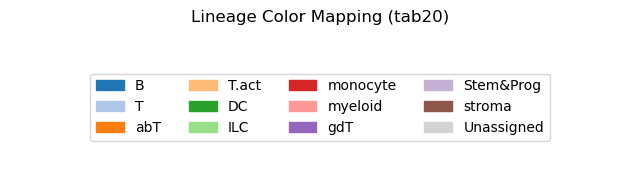

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def show_palette(palette):
    handles = [mpatches.Patch(color=color, label=label) for label, color in palette.items()]
    plt.figure(figsize=(8, 2))
    plt.legend(handles=handles, loc='center', ncol=4)
    plt.axis('off')
    plt.title("Lineage Color Mapping (tab20)")
    plt.show()

show_palette(lineage_colors)

### Celltype_to_lineage

In [56]:
# Load lineage info
qc = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
qc.columns = qc.columns.str.strip()
qc["CellType"] = qc["CellType"].str.strip()
qc["Lineage"] = qc["Lineage"].str.strip()

# Mapping CellType → Lineage
celltype_to_lineage = qc.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# 2. Determine the relationship between the chromatin landscape and gene expression

## i. Does clustering of the gene expression matrix show the same relationships between cell types as the ATAC-seq data?

In [57]:
#load the ATAC dataset: columns = cell types, rows=peaks
ATAC_scaled_ct = pd.read_csv("data/ATAC_scaled.ct.csv", sep=",")
ATAC_scaled_ct.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,-0.622619,-0.913335,-0.818014,-0.843321,0.867794,-0.931503,-0.956155,0.241998,-0.977376,-0.882360,...,-0.985004,-0.867550,1.323434,-0.147860,-0.842635,1.530753,-0.931429,-0.984957,1.270846,-0.044332
1,-0.622619,0.737160,-0.818014,-0.843278,-0.960118,-0.931490,-0.956118,-1.104052,-0.977401,-0.882315,...,1.306379,-0.867550,-0.231432,-0.903931,-0.842659,-0.994405,-0.931381,1.362299,-0.510506,-0.887236
2,0.723878,-0.913378,-0.818014,-0.843321,-0.960118,-0.931503,-0.956135,1.178320,-0.977390,-0.882360,...,-0.984966,-0.867524,0.386909,-0.903904,-0.842659,-0.991005,0.906252,-0.317633,1.234219,-0.887283
3,-0.622619,-0.913378,-0.818063,-0.843321,-0.960101,-0.931487,-0.956135,1.296989,-0.977364,-0.882360,...,-0.984987,0.930837,-1.047119,-0.903951,-0.842611,1.498200,-0.931381,1.603222,1.234219,-0.887283
4,-0.622619,-0.913378,-0.818063,-0.843321,-0.960118,-0.931490,0.543993,1.178320,-0.977390,-0.882334,...,-0.984987,-0.867550,-1.047119,0.710273,-0.842635,-0.994405,-0.931393,-0.317633,0.004627,1.689424


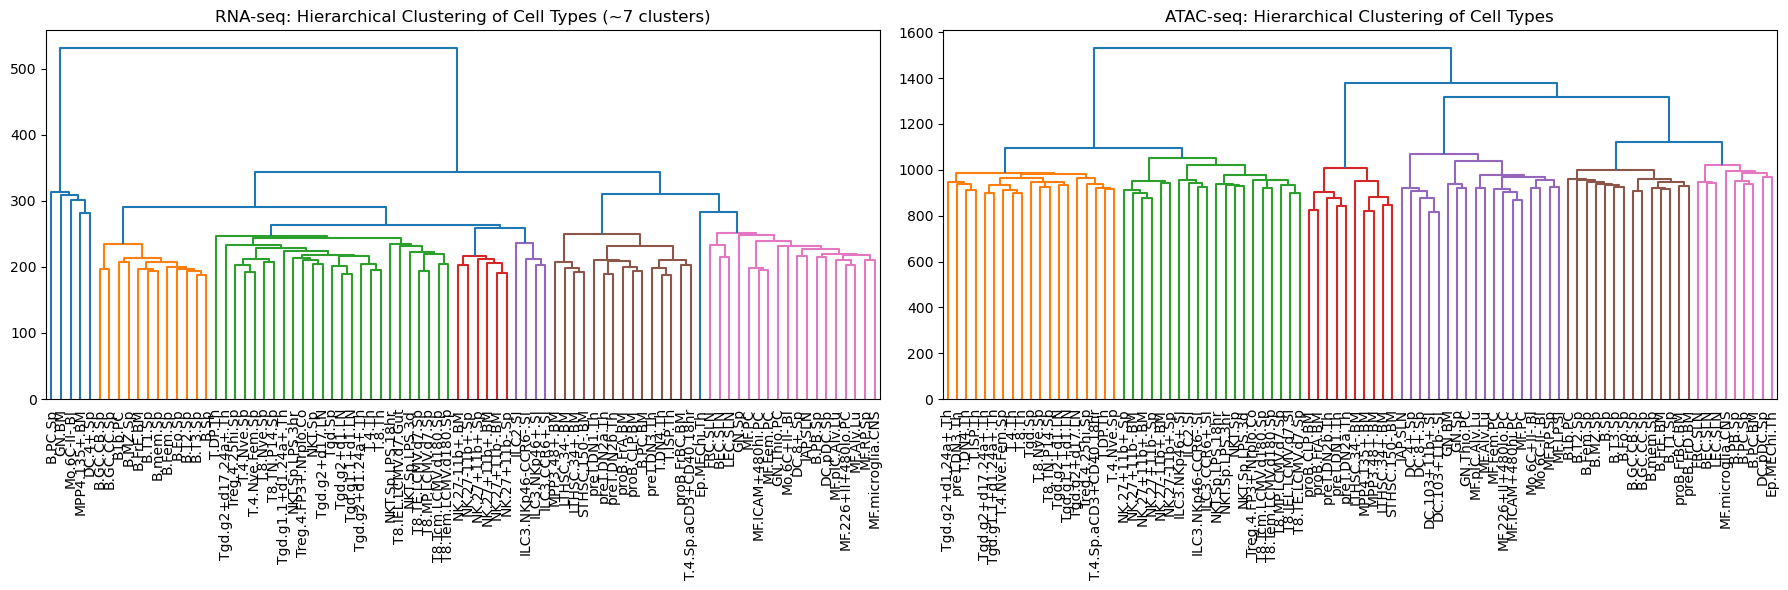

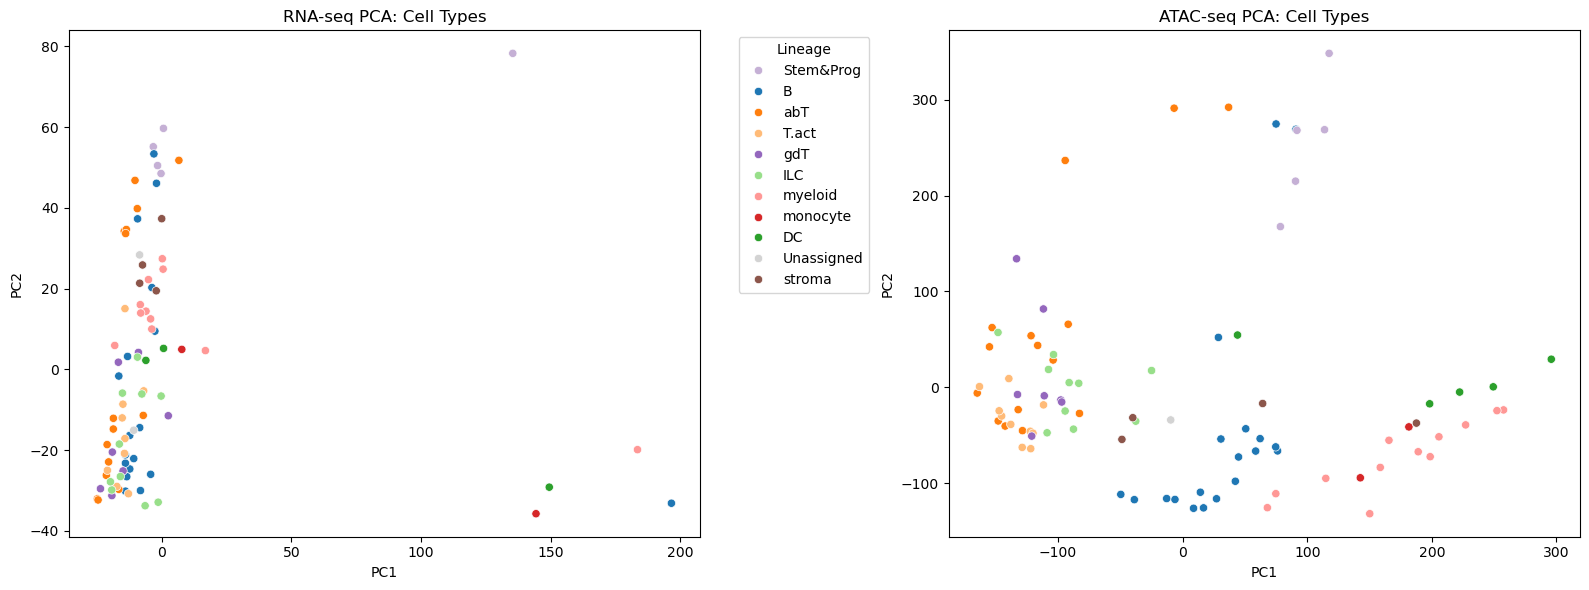

In [60]:
# prepare RNA
rna_by_celltype = RNA_normalized.T  # CellType × Gene
rna_scaled = rna_by_celltype

rna_celltypes = rna_by_celltype.index.tolist()
rna_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in rna_celltypes]

# prepare ATAC
atac_by_celltype = ATAC_scaled_ct.drop(columns="cluster", errors='ignore').T  # CellType × Peak
atac_celltypes = atac_by_celltype.index.tolist()
atac_lineages = [celltype_to_lineage.get(ct, "Unassigned") for ct in atac_celltypes]

# Clustering-Dendrograms 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# RNA
linkage_rna = sch.linkage(pdist(rna_scaled), method="ward")
num_clusters_rna = 7
threshold_rna = linkage_rna[-num_clusters_rna + 1, 2] * 0.85
sch.dendrogram(linkage_rna,
               labels=rna_celltypes,
               leaf_rotation=90,
               leaf_font_size=10,
               ax=axs[0],
               color_threshold=threshold_rna)
axs[0].set_title(f"RNA-seq: Hierarchical Clustering of Cell Types (~{num_clusters_rna} clusters)")

# ATAC
linkage_atac = sch.linkage(pdist(atac_by_celltype), method="ward")
sch.dendrogram(linkage_atac, labels=atac_celltypes, leaf_rotation=90, leaf_font_size=10, ax=axs[1])
axs[1].set_title("ATAC-seq: Hierarchical Clustering of Cell Types")

plt.tight_layout()
plt.savefig("figures/dendrogramm_RNA_vs_ATAC.png", dpi=300, bbox_inches="tight")
plt.show()

# PCA-Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

pca_rna = PCA(n_components=2).fit_transform(rna_scaled)
sns.scatterplot(x=pca_rna[:, 0], y=pca_rna[:, 1],
                hue=rna_lineages, palette=lineage_colors, ax=axs[0])
axs[0].set_title("RNA-seq PCA: Cell Types")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")

pca_atac = PCA(n_components=2).fit_transform(atac_by_celltype)
sns.scatterplot(x=pca_atac[:, 0], y=pca_atac[:, 1],
                hue=atac_lineages, palette=lineage_colors, ax=axs[1])
axs[1].set_title("ATAC-seq PCA: Cell Types")
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC2")

# chared legend
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend_.remove()
axs[0].legend(handles, labels, title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("figures/PCA_RNA_vs_ATAC.png", dpi=300, bbox_inches="tight")
plt.show()


Clustering of RNA expression shows no clear difference between cell types. 

## ii. Can one cluster genes based on their expression profiles?

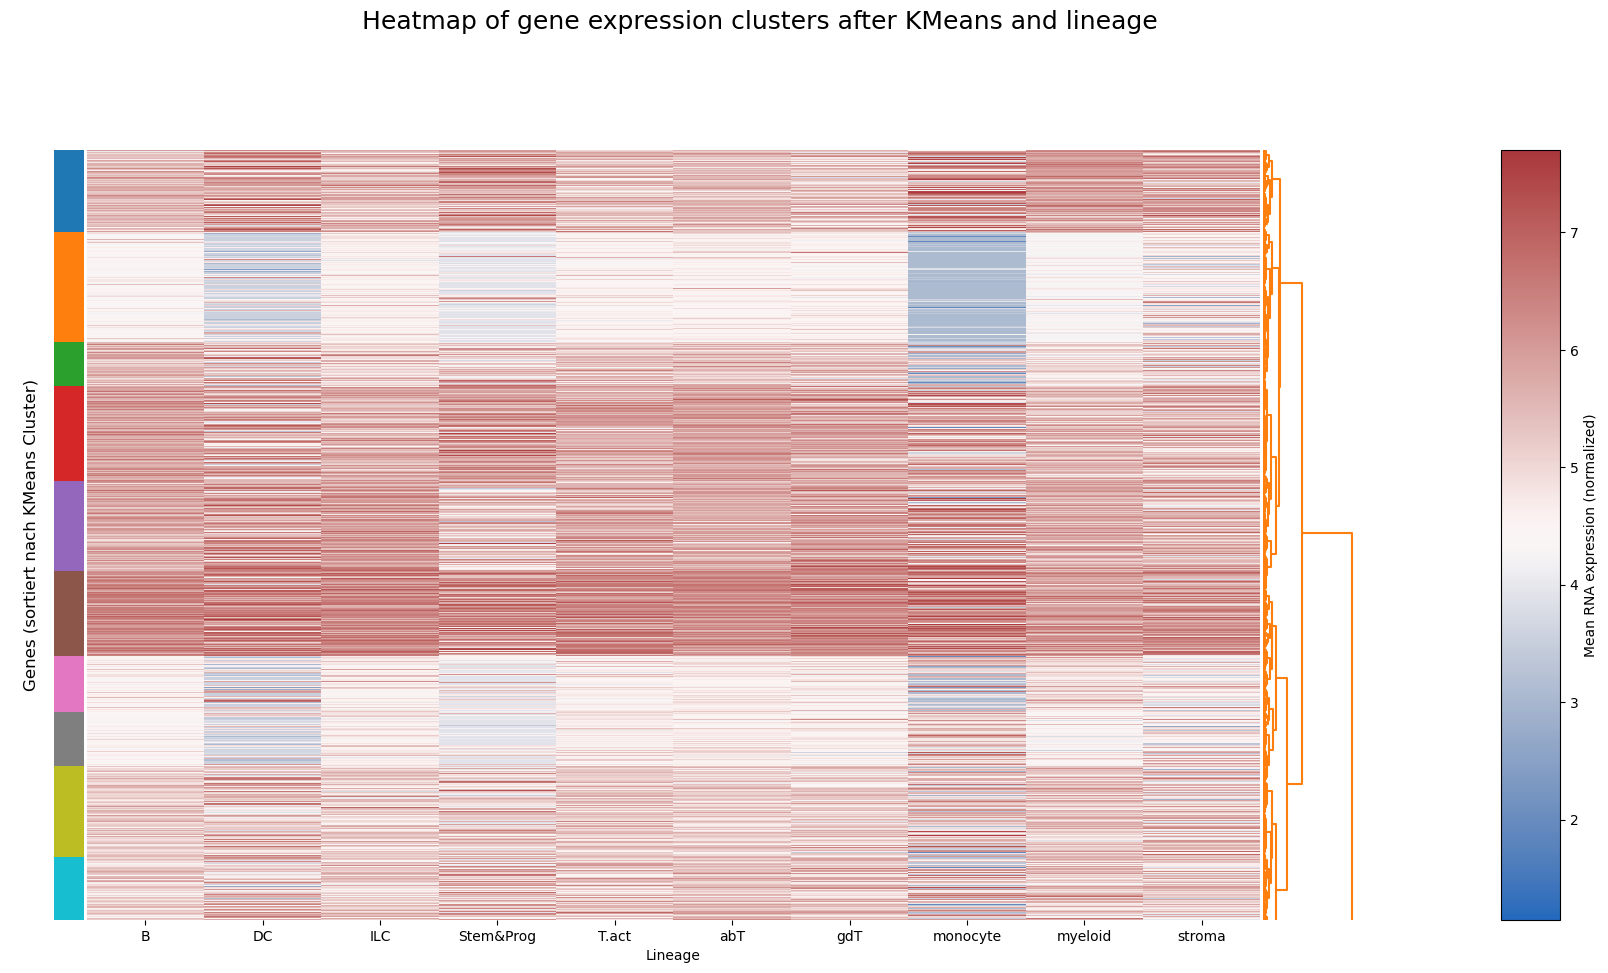

In [71]:
# KMeans Clustering (k=7) 
kmeans_7 = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_7.fit(RNA_normalized)
labels_7 = kmeans_7.labels_

# QC laden und mapping 
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()
celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# Filter gültige Zelltypen 
valid_celltypes = [ct for ct in RNA_normalized.columns if ct in celltype_to_lineage]
RNA_filtered = RNA_normalized[valid_celltypes]
lineages = [celltype_to_lineage[ct] for ct in valid_celltypes]
RNA_filtered.columns = lineages
RNA_grouped = RNA_filtered.groupby(axis=1, level=0).mean()

# Clusterlabels hinzufügen 
RNA_grouped["cluster"] = labels_7

# Sortieren nach Cluster 
RNA_sorted = RNA_grouped.sort_values("cluster")
heatmap_data = RNA_sorted.drop(columns="cluster")

# Farben für Cluster 
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in RNA_sorted["cluster"]]

# Dendrogramm der Gene berechnen 
linkage_genes = sch.linkage(heatmap_data, method='ward')

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.7, 0.5, 20, 4, 1], wspace=0.01)

# Y-Achsenlabel als Text-ax
ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "Genes (sortiert nach KMeans Cluster)", rotation=90,
              va='center', ha='center', fontsize=12)

# Cluster Farbleiste 
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, heatmap_data.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# Heatmap 
ax0 = fig.add_subplot(gs[2])
sns.heatmap(heatmap_data, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax0)
ax0.set_xlabel("Lineage")
ax0.set_ylabel("")

# 4. Dendrogramm 
ax1 = fig.add_subplot(gs[3])
sch.dendrogram(linkage_genes, orientation='right', ax=ax1, no_labels=True, color_threshold=None)
ax1.invert_yaxis()
ax1.axis('off')
ax1.set_ylim(ax0.get_ylim())

# 5. Colorbar 
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=heatmap_data.values.min(), vmax=heatmap_data.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)

plt.suptitle("Heatmap of gene expression clusters after KMeans and lineage", fontsize=18, y=1.02)
plt.savefig("figures/Heatmap_RNAclusters_lineages.png", dpi=300, bbox_inches="tight")
plt.show()

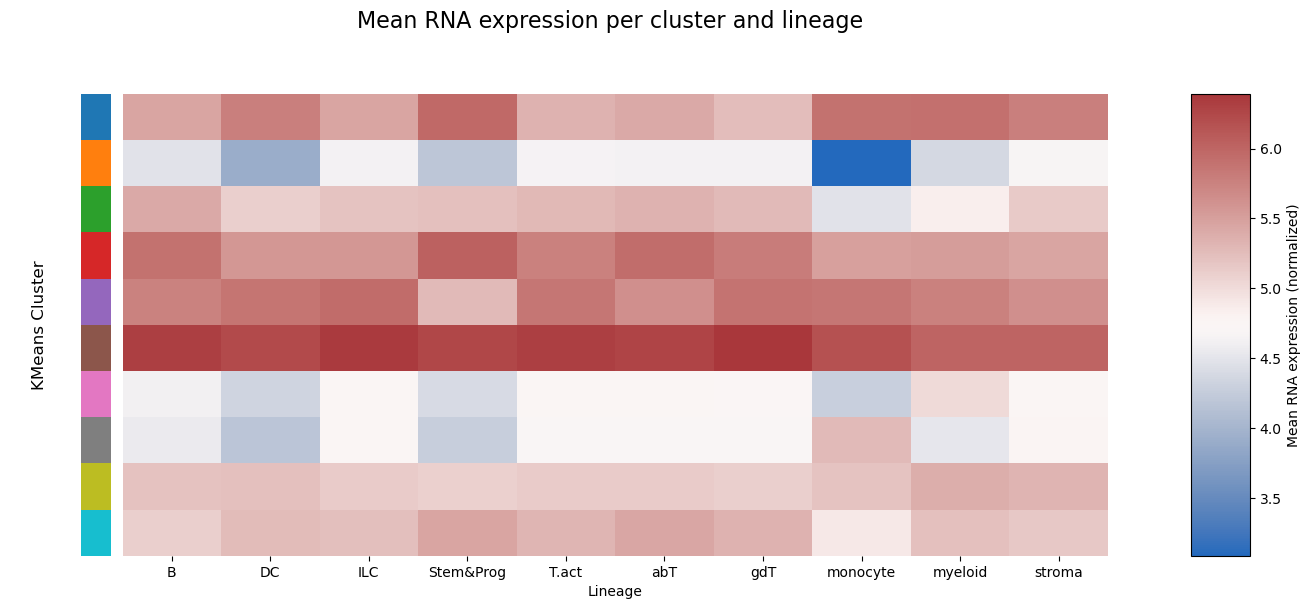

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# 1. KMeans Clustering (k=7)
kmeans_7 = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_7.fit(RNA_normalized)
labels_7 = kmeans_7.labels_

# 2. QC laden und Mapping
QC = pd.read_csv("data/ATAC_QCmatric.csv", sep=";")
QC.columns = QC.columns.str.strip()
QC["CellType"] = QC["CellType"].str.strip()
QC["Lineage"] = QC["Lineage"].str.strip()
celltype_to_lineage = QC.drop_duplicates("CellType").set_index("CellType")["Lineage"]

# 3. Filter gültige Zelltypen
valid_celltypes = [ct for ct in RNA_normalized.columns if ct in celltype_to_lineage]
RNA_filtered = RNA_normalized[valid_celltypes]
lineages = [celltype_to_lineage[ct] for ct in valid_celltypes]
RNA_filtered.columns = lineages

# 4. Aggregiere: Mittelwert pro Lineage
RNA_grouped = RNA_filtered.groupby(axis=1, level=0).mean()

# 5. Clusterlabels hinzufügen
RNA_grouped["cluster"] = labels_7

# 6. Mittelwert der Genexpression pro Cluster
cluster_means = RNA_grouped.groupby("cluster").mean()  # Cluster × Lineage

# 7. Farben für Cluster-Zeilen
cluster_palette = sns.color_palette("tab10", 10)
row_colors = [cluster_palette[i] for i in cluster_means.index]

# 8. Figure & Gridspec vorbereiten
fig = plt.figure(figsize=(16, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[0.3, 0.15, 5, 0.3, 0.3], wspace=0.05)

# 1. Cluster-Farbbar (schmaler)
ax_cluster = fig.add_subplot(gs[1])
ax_cluster.set_xlim(0, 1)
ax_cluster.set_ylim(0, cluster_means.shape[0])
ax_cluster.axis('off')
for y, color in enumerate(row_colors):
    ax_cluster.add_patch(plt.Rectangle((0, y), 1, 1, facecolor=color, edgecolor='none'))
ax_cluster.invert_yaxis()

# 2. Heatmap (ohne Y-Ticklabels)
ax_heatmap = fig.add_subplot(gs[2])
sns.heatmap(cluster_means, cmap="vlag", yticklabels=False, xticklabels=True, cbar=False, ax=ax_heatmap)
ax_heatmap.set_xlabel("Lineage")
ax_heatmap.set_ylabel("")

# 3. Colorbar
ax_cb = fig.add_subplot(gs[4])
norm = plt.Normalize(vmin=cluster_means.values.min(), vmax=cluster_means.values.max())
sm = plt.cm.ScalarMappable(cmap="vlag", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=ax_cb)
cbar.set_label('Mean RNA expression (normalized)')
cbar.ax.yaxis.label.set_rotation(90)


ax_label = fig.add_subplot(gs[0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, "KMeans Cluster", rotation=90, ha='center', va='center', fontsize=12)



# 4. Titel
plt.suptitle("Mean RNA expression per cluster and lineage", fontsize=16, y=1.02)

# 5. Speichern & Anzeigen
plt.savefig("figures/Heatmap_RNAclusters_lineages_mean.png", dpi=300, bbox_inches="tight")
plt.show()


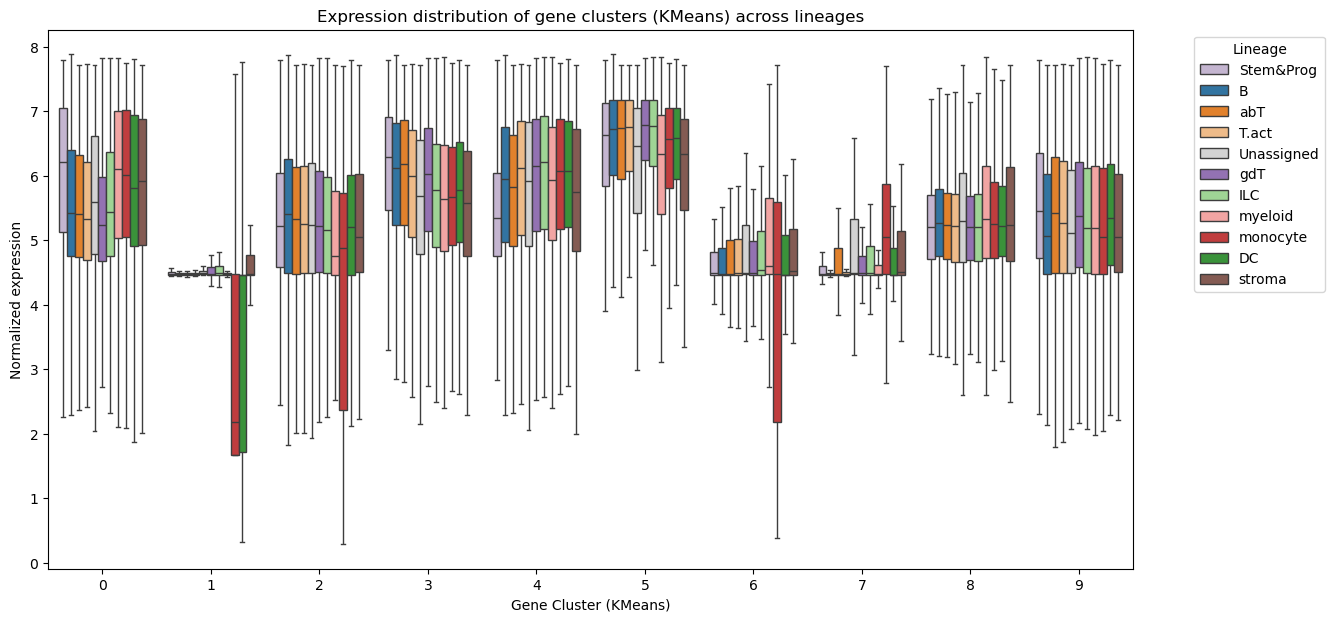

In [74]:
RNA_clustered = RNA_normalized.copy()

#creating cluster label
RNA_clustered['cluster'] = labels_7

#creating plot
plot_data = []

for cluster_id, group in RNA_clustered.groupby('cluster'):
    for ct in RNA_normalized.columns:
        expr_values = group[ct].values
        for val in expr_values:
            plot_data.append({
                'cluster': cluster_id,
                'cell_type': ct,
                'expression': val,
                'lineage': celltype_to_lineage.get(ct, 'Unassigned')
            })

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(14, 7))
sns.boxplot(x='cluster', y='expression', hue='lineage', palette=lineage_colors, data=plot_df, showfliers=False)
plt.title("Expression distribution of gene clusters (KMeans) across lineages")
plt.xlabel("Gene Cluster (KMeans)")
plt.ylabel("Normalized expression")
plt.legend(title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("figures/Distribution_geneclusters_lineages.png", dpi=300, bbox_inches="tight")
plt.show()

Expression level is highest in cluster 1.

### a) Can you determine a specific set of genes for your cell lineage?

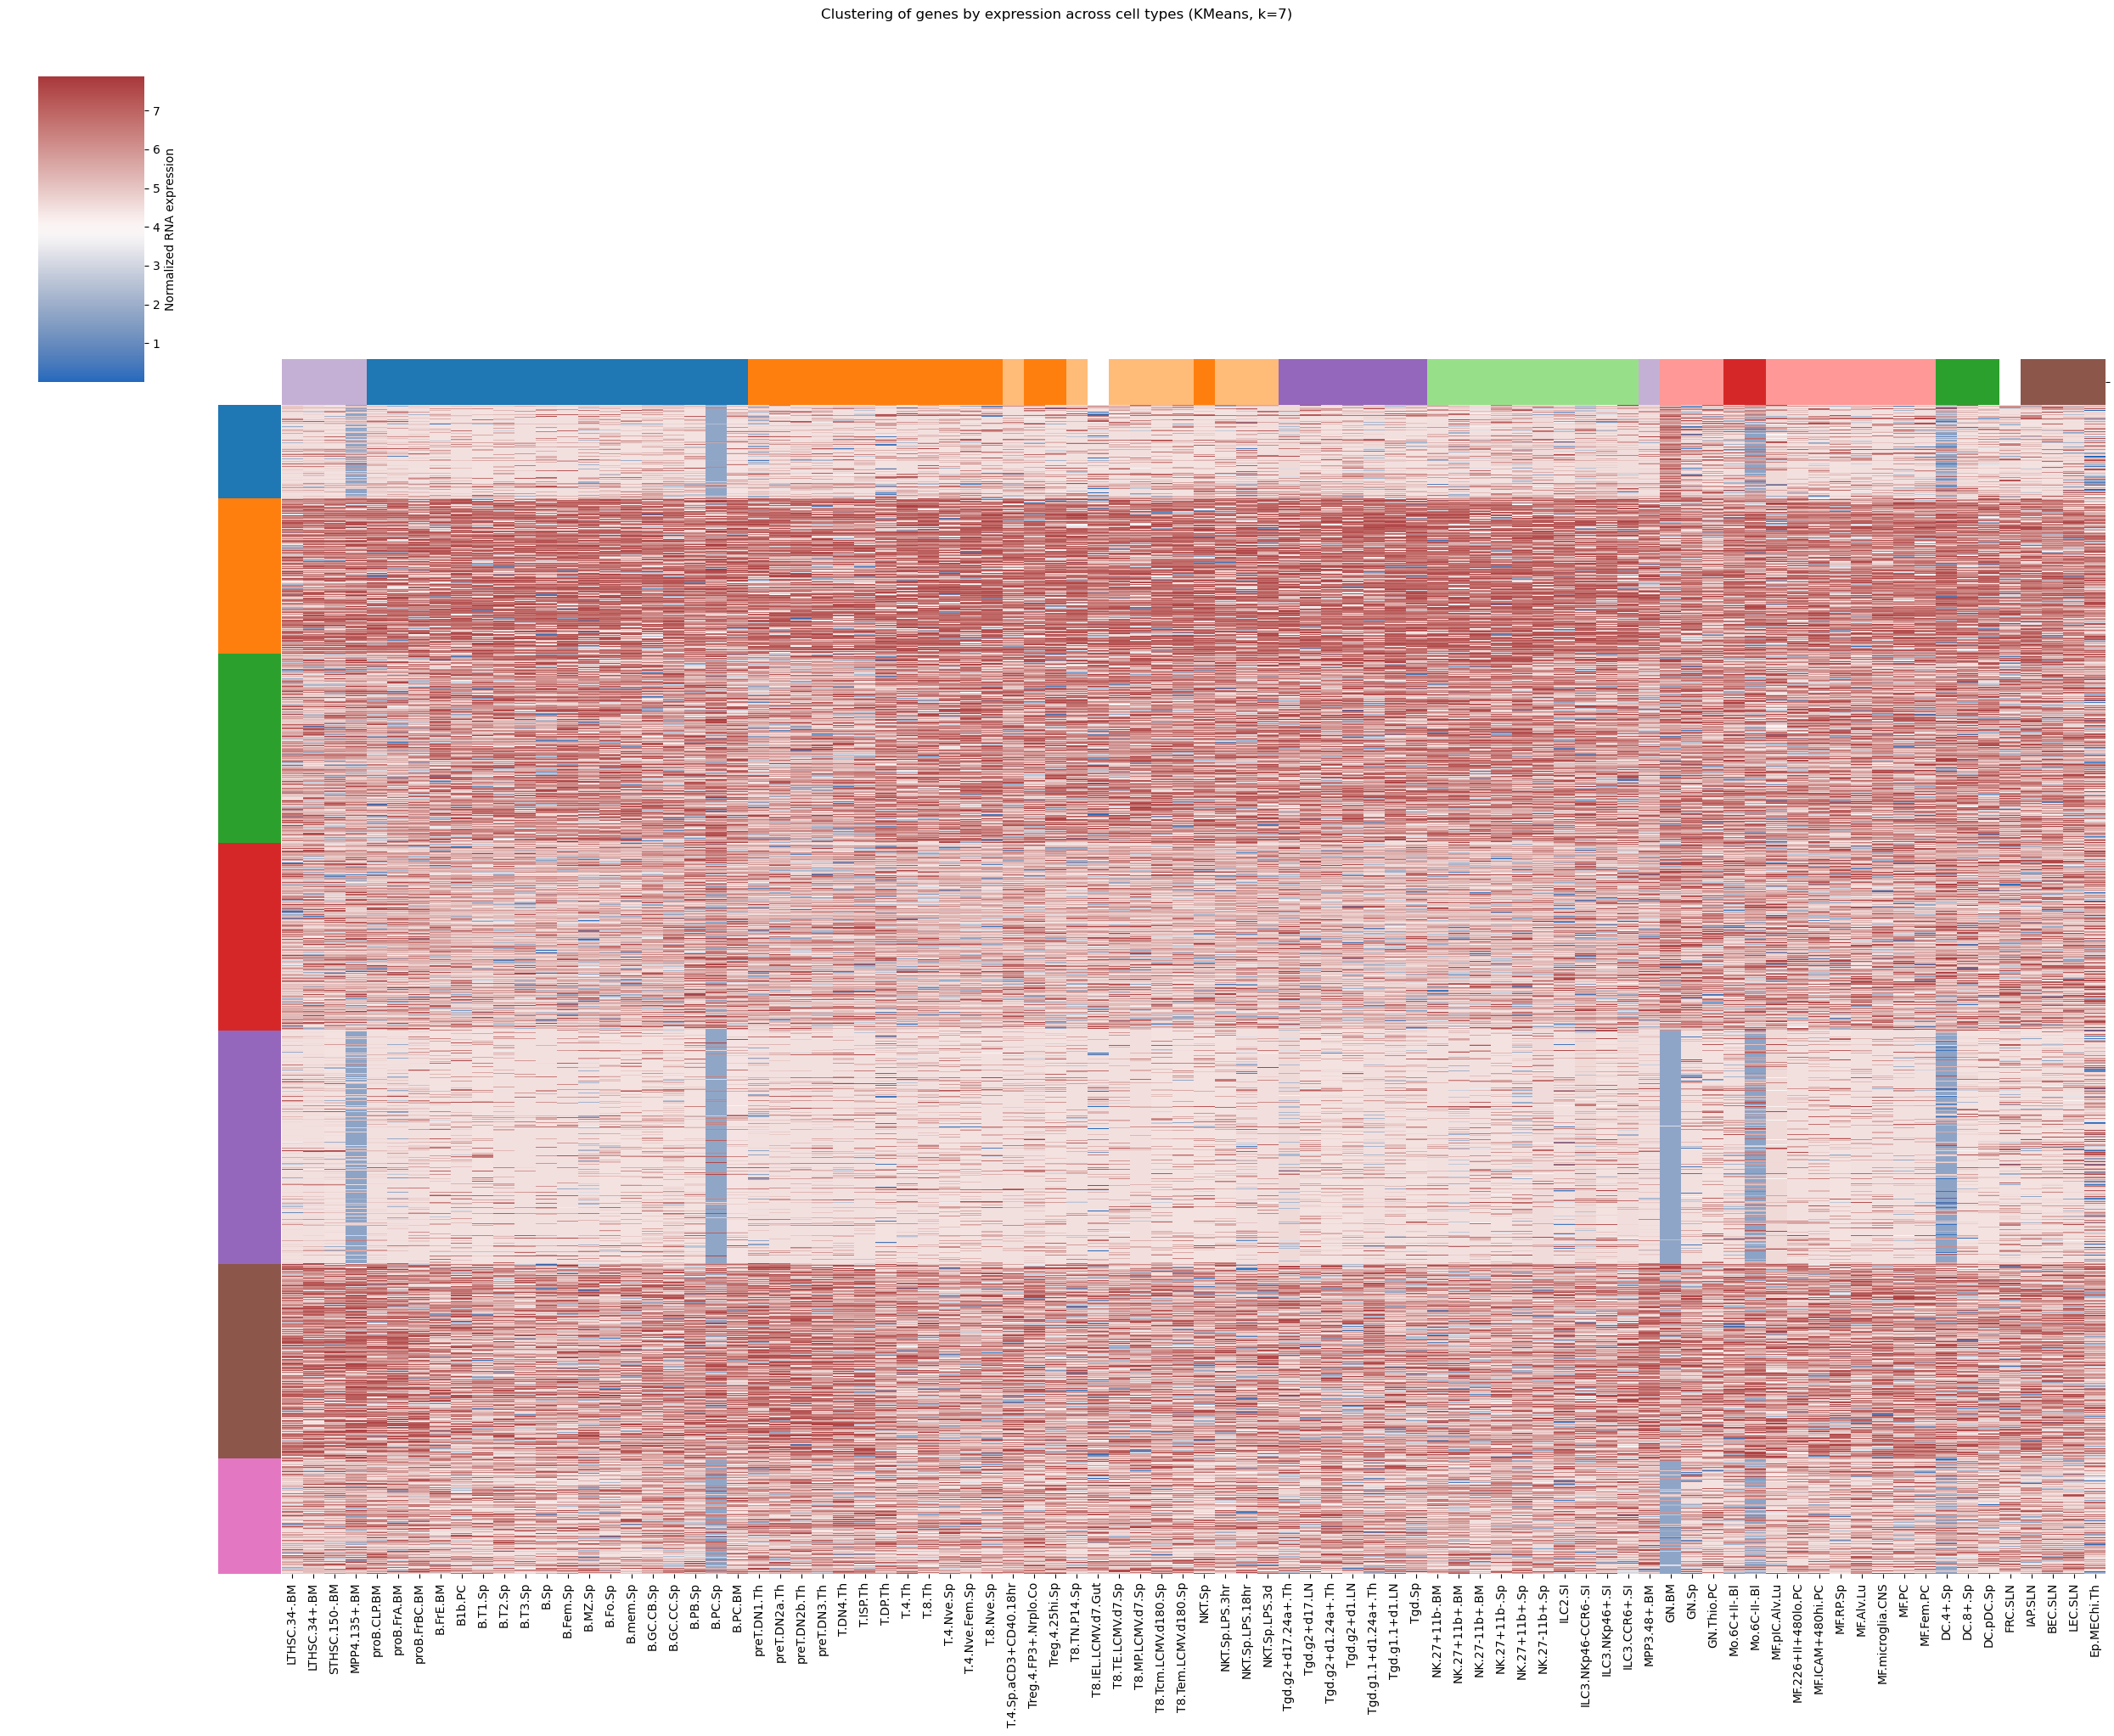

In [29]:
# Define color of cell types 
celltypes = RNA_normalized.columns
lineages = [celltype_to_lineage.get(ct, "Unknown") for ct in celltypes]
col_colors = pd.Series(lineages, index=celltypes).map(lineage_colors)

# Perform KMeans clustering on genes (rows) with k=8
k = 7
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(RNA_normalized)

# Sort genes by cluster labels for visualization
sorted_indices = cluster_labels.argsort()
RNA_sorted = RNA_normalized.iloc[sorted_indices]
cluster_labels_sorted = cluster_labels[sorted_indices]

# Create a color palette for gene clusters
gene_palette = sns.color_palette("tab10", k)
gene_colors = [gene_palette[label] for label in cluster_labels_sorted]

#Heatmap of gene expression sorted by KMeans clusters
sns.clustermap(
    RNA_sorted,
    cmap="vlag",
    col_cluster=False,    # no column clustering
    row_cluster=False,    # no row clustering because we sorted manually
    col_colors=col_colors,
    row_colors=gene_colors,  # color bars for gene clusters
    yticklabels=False,
    figsize=(25, 20),
    dendrogram_ratio=(.1, .2),
    cbar_kws={'label': 'Normalized RNA expression'}
)

plt.suptitle("Clustering of genes by expression across cell types (KMeans, k=7)", y=1.02)
plt.show()


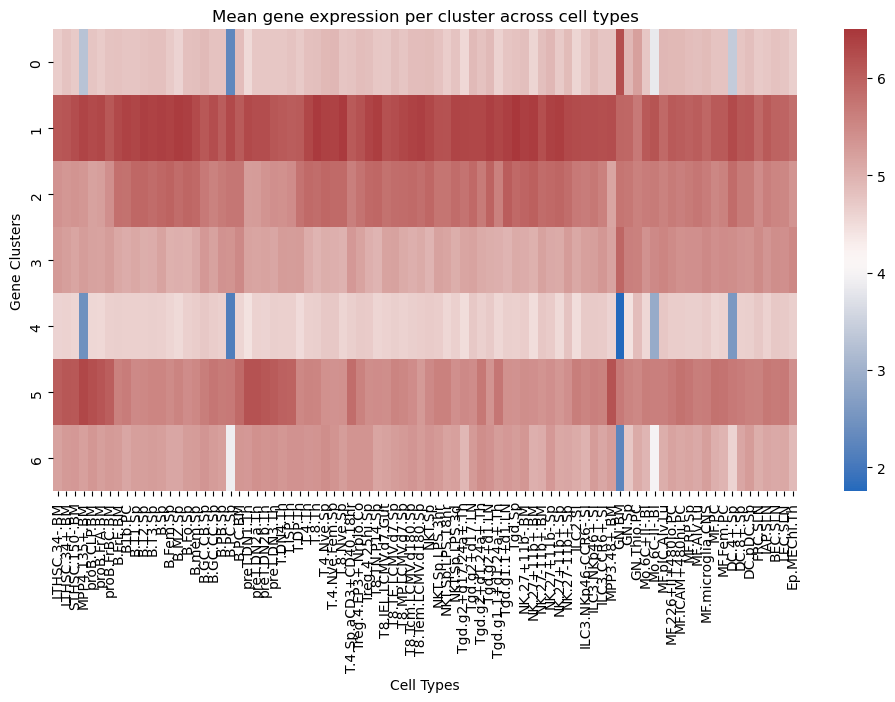

In [30]:
# Add cluster labels as a new column
RNA_clustered = RNA_normalized.copy()
RNA_clustered['cluster'] = cluster_labels

# Calculate mean expression per cluster (averaged over genes in cluster)
mean_expr_per_cluster = RNA_clustered.groupby("cluster").mean()

plt.figure(figsize=(12, 6))
sns.heatmap(mean_expr_per_cluster, cmap="vlag", xticklabels=True)
plt.xlabel("Cell Types")
plt.ylabel("Gene Clusters")
plt.title("Mean gene expression per cluster across cell types")
plt.show()

In [31]:
target_lineage = "B"  

# Identify cell types of the target lineage
target_celltypes = [ct for ct in RNA_normalized.columns if celltype_to_lineage.get(ct, "") == target_lineage]

# Calculate mean expression in target lineage vs other cell types for each cluster
cluster_means = RNA_clustered.groupby("cluster")[target_celltypes].mean().mean(axis=1)
cluster_background = RNA_clustered.groupby("cluster").mean().drop(columns=target_celltypes).mean(axis=1)

# Log2 fold-change of expression
log2_fc = np.log2((cluster_means + 1e-9) / (cluster_background + 1e-9))

# Sort clusters by enrichment
log2_fc.sort_values(ascending=False, inplace=True)

print("Cluster enrichment for lineage:", target_lineage)
print(log2_fc)


Cluster enrichment for lineage: B
cluster
1    0.018789
5    0.010783
2    0.010576
6    0.008554
4   -0.007538
3   -0.018299
0   -0.034223
dtype: float64


Cluster 2 has biggest B-cell enrichtment. 

In [32]:
# Identify the top enriched cluster (highest log2 FC)
top_cluster = log2_fc.index[0]

# Extract marker genes from this cluster
marker_genes = RNA_clustered[RNA_clustered['cluster'] == top_cluster].index.tolist()
print(f"Number of marker genes in cluster {top_cluster}: {len(marker_genes)}")


Number of marker genes in cluster 1: 2334


#### Boxplot: Comparing expression in B-cells vs other lineages per gene cluster

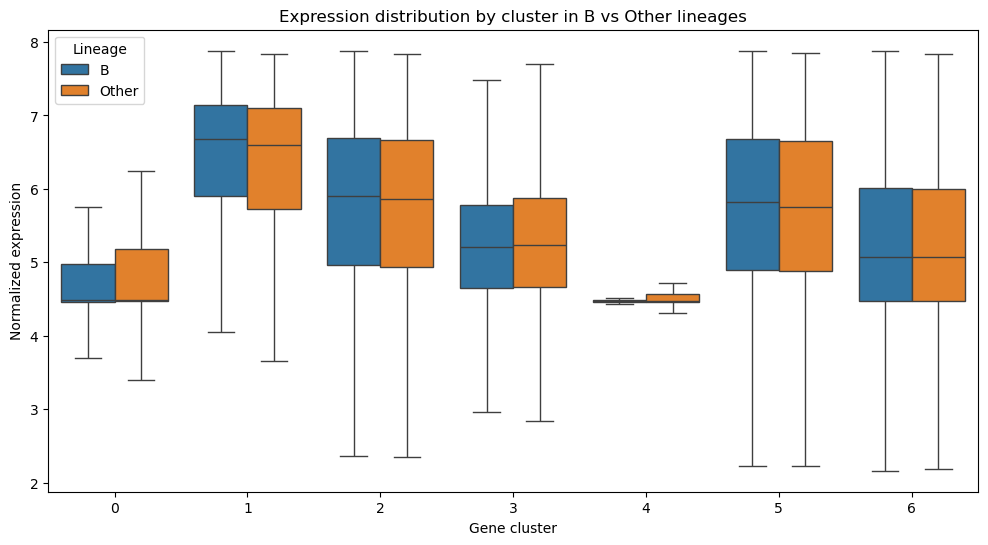

In [33]:
other_celltypes = [ct for ct in RNA_normalized.columns if ct not in target_celltypes]

plot_data = []
for cluster_id, group in RNA_clustered.groupby("cluster"):
    expr_target = group[target_celltypes].values.flatten()
    expr_others = group[other_celltypes].values.flatten()
    
    plot_data.extend([
        {"cluster": cluster_id, "lineage": target_lineage, "expression": val} for val in expr_target
    ])
    plot_data.extend([
        {"cluster": cluster_id, "lineage": "Other", "expression": val} for val in expr_others
    ])

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 6))
sns.boxplot(x="cluster", y="expression", hue="lineage", data=plot_df, showfliers=False)
plt.title(f"Expression distribution by cluster in {target_lineage} vs Other lineages")
plt.ylabel("Normalized expression")
plt.xlabel("Gene cluster")
plt.legend(title="Lineage")
plt.show()


Cluster 2 may show biggest B-cell enrichment but it is not significant. 

### b. Are there subclusters of special interest?

In [34]:
# 2 subcluster pro KMeans-Cluster 
n_subclusters = 2

# DataFrame to save information about subcluster
subcluster_assignments = pd.Series(index=RNA_normalized.index, dtype=int)

for cluster_id in np.unique(labels_7):
    # Genes in KMeans-Cluster
    genes_in_cluster = RNA_normalized.index[labels_7 == cluster_id]
    data_subset = RNA_normalized.loc[genes_in_cluster]
    
    # Hierarchical Clustering (Ward) of genes within clusters
    linkage_matrix = linkage(data_subset, method='ward')
    subclusters = fcluster(linkage_matrix, t=n_subclusters, criterion='maxclust')
    
    # Subcluster IDs for all KMeans-Cluster
    subcluster_ids = subclusters + cluster_id * n_subclusters
    
    subcluster_assignments.loc[genes_in_cluster] = subcluster_ids

# subcluster as DataFrame with KMeans-Cluster
cluster_df = pd.DataFrame({
    'kmeans_cluster': labels_7,
    'subcluster': subcluster_assignments
}, index=RNA_normalized.index)


/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/miniconda3/envs/envBCells1/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


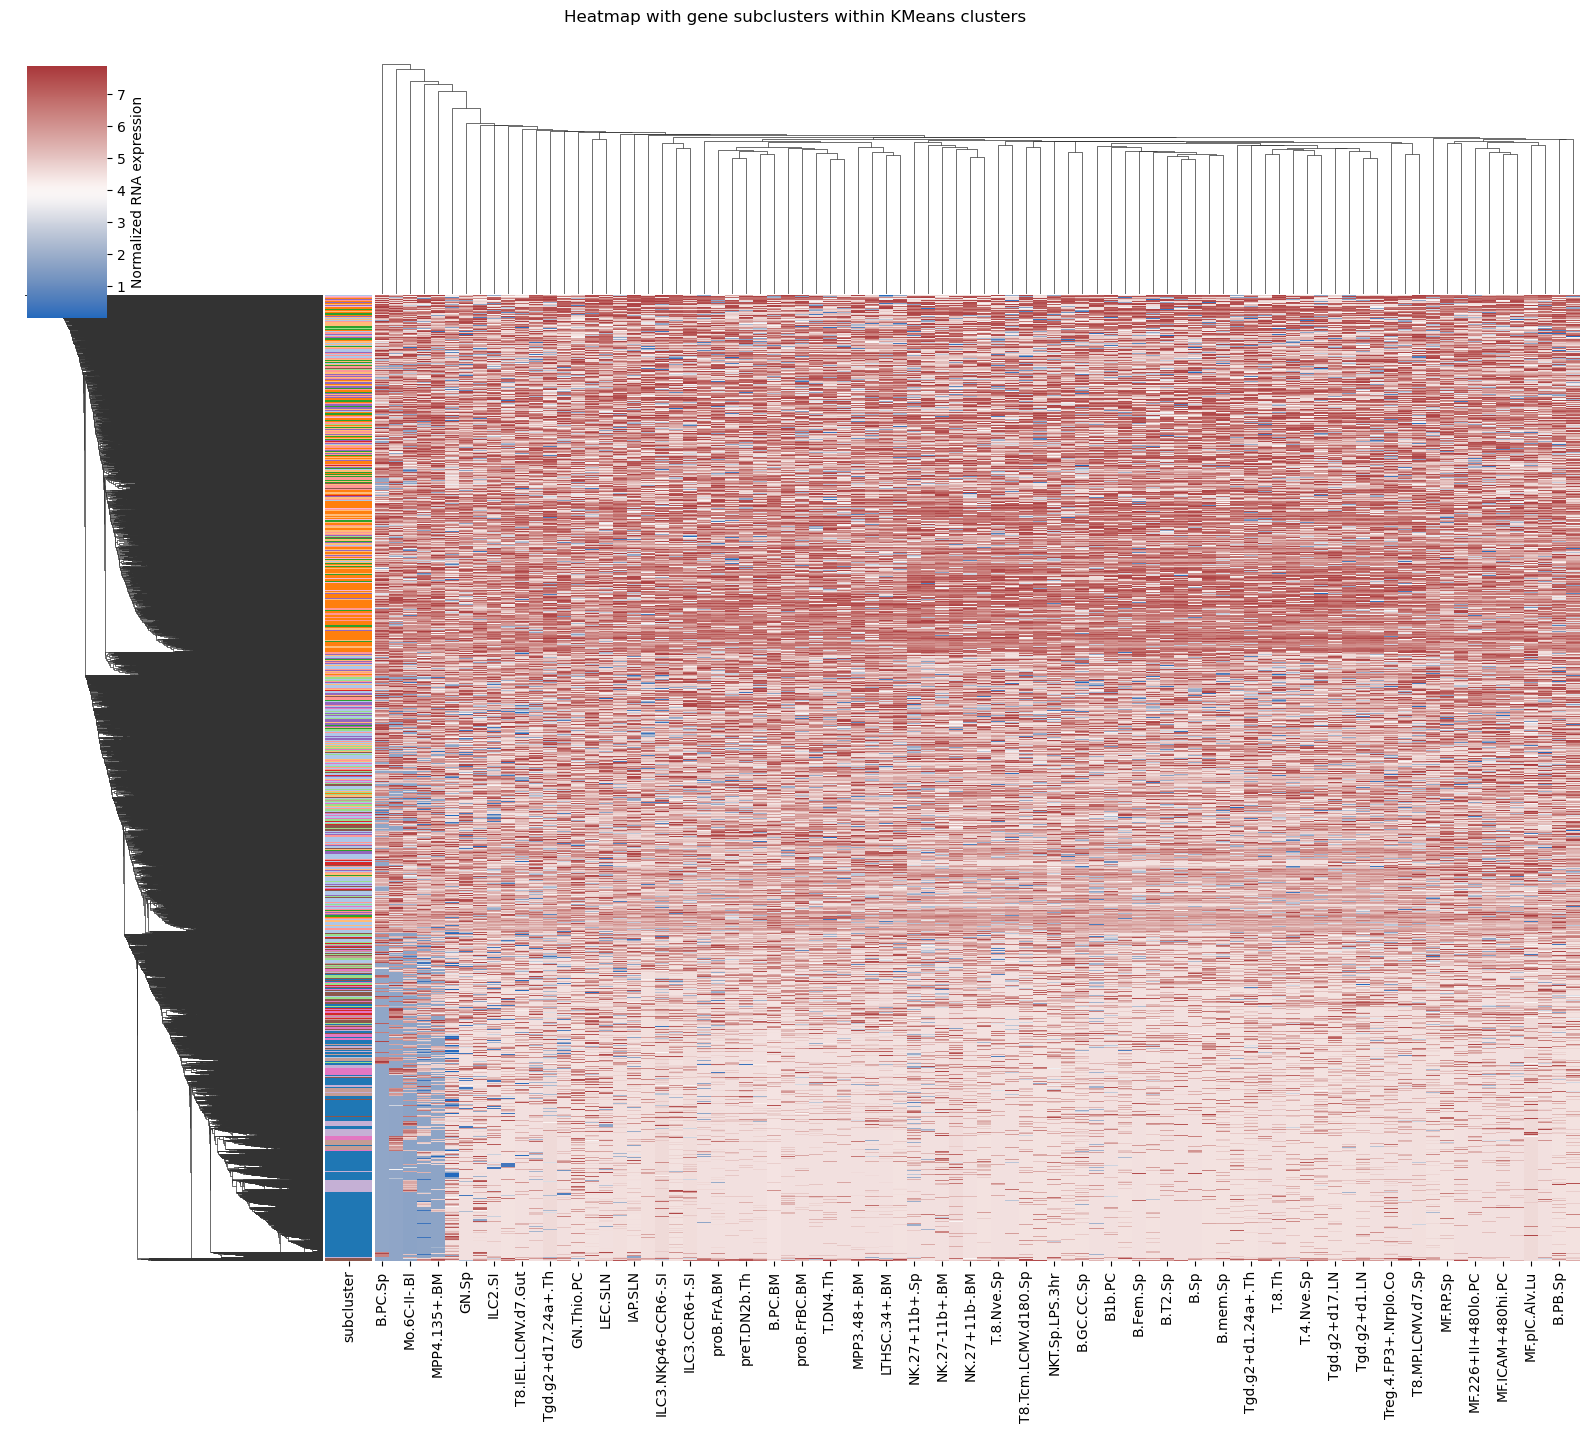

In [35]:
# palette für Subcluster 
unique_subclusters = cluster_df['subcluster'].unique()
colors_subclusters = sns.color_palette("tab20", len(unique_subclusters))
subcluster_color_map = dict(zip(unique_subclusters, colors_subclusters))
row_colors = cluster_df['subcluster'].map(subcluster_color_map)

# Heatmap
sns.clustermap(
    RNA_normalized,
    cmap="vlag",
    col_cluster=True,  
    row_cluster=True,  
    row_colors=row_colors,
    figsize=(16, 14),
    yticklabels=False,
    cbar_kws={'label': 'Normalized RNA expression'}
)
plt.suptitle("Heatmap with gene subclusters within KMeans clusters", y=1.02)
plt.show()


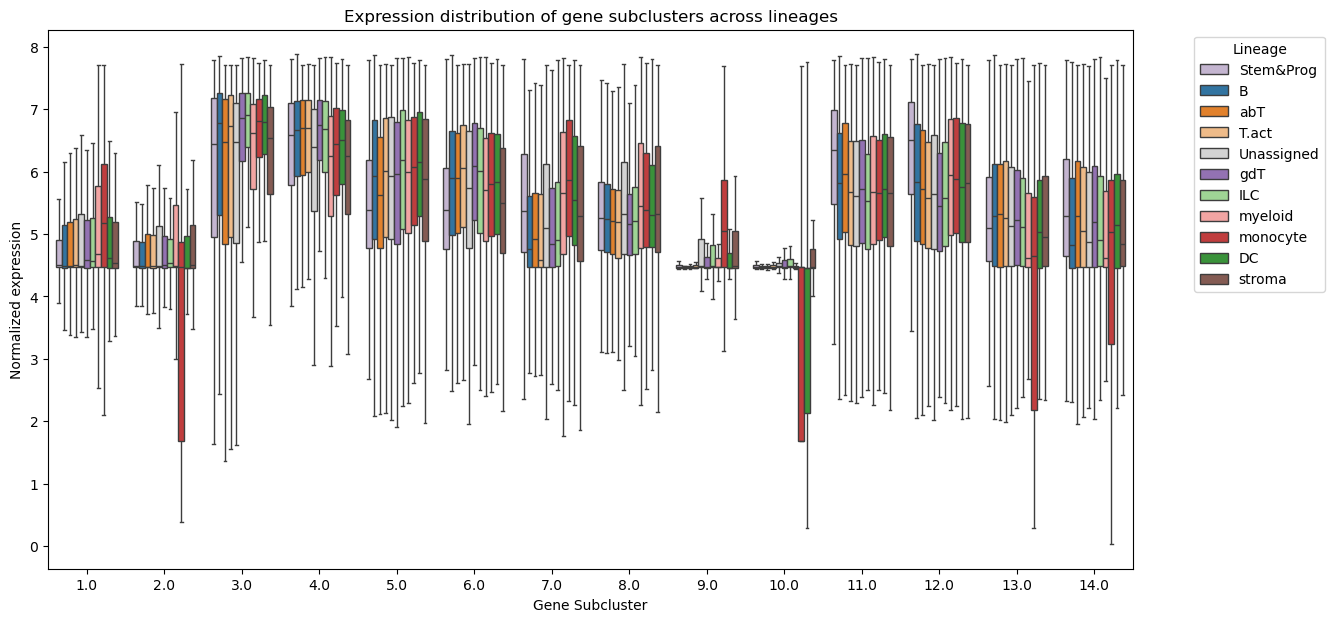

In [36]:
# Add subcluster assignment to the genes
RNA_subclustered = RNA_normalized.copy()
RNA_subclustered['subcluster'] = cluster_df['subcluster']

# DataFrame for boxplot
plot_data = []

for subclust_id, group in RNA_subclustered.groupby('subcluster'):
    for ct in RNA_normalized.columns:
        expr_values = group[ct].values
        for val in expr_values:
            plot_data.append({
                'subcluster': subclust_id,
                'cell_type': ct,
                'expression': val,
                'lineage': celltype_to_lineage.get(ct, 'Unassigned')
            })

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(14, 7))
sns.boxplot(x='subcluster', y='expression', hue='lineage', palette=lineage_colors,  data=plot_df, showfliers=False)
plt.title("Expression distribution of gene subclusters across lineages")
plt.xlabel("Gene Subcluster")
plt.ylabel("Normalized expression")
plt.legend(title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("figures/Distribution_geneclusters_lineages_sublucters.png", dpi=300, bbox_inches="tight")
plt.show()


There are also no sublucters of special interest. 

##  iii. Can one use correlation analysis and distance information to associate ATAC-seq regions with gene expression?

###  a) Where are associated CREs located with respect to the TSS?

### b) Where are the most associated CREs located?

### c) How many CREs are associated with genes?

### d) Is every promoter associated with a gene?

### e) Are some promoters associated with other genes?

### f) What is the closest associated CRE to a gene?

### g) Are there CREs that control several genes?

## iv. Can one use regression to associate CREs with gene expression?

### a) How much of the variance of gene expression can be explained for each gene with this approach?

In [10]:
#load the ATAC dataset

ATAC = pd.read_csv("data/1.ATAC-Seq data.CSV", sep=";")
ATAC.head()


,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,0.41,0.71,...,0.10,0.10,43525.00,13516.00,0.52,46388.00,0.10,0.57,46447.0,14977.00
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,0.41,23377.00,...,45839.00,0.10,14977.00,0.47,0.11,0.92,0.98,42401.00,12451.0,0.94
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,45879.00,1.0,NaN,NaN,13181.00,0.10,...,0.87,0.54,26330.00,0.95,0.11,63.38,33817.00,12055.00,45748.0,0.11
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,45691.00,1.0,NaN,NaN,0.41,0.10,...,0.44,30317.00,0.66,0.11,0.92,45790.00,0.98,46753.00,45748.0,0.11
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,11324.00,NaN,NaN,NaN,0.41,0.10,...,0.44,0.10,0.66,28856.00,0.51,0.92,0.75,12055.00,22282.0,45781.00


In [38]:
ATAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512595 entries, 0 to 512594
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ImmGenATAC1219.peakID            512595 non-null  object 
 1   chrom                            512595 non-null  object 
 2   Summit                           512595 non-null  int64  
 3   mm10.60way.phastCons_scores      512595 non-null  float64
 4   _-log10_bestPvalue               512595 non-null  float64
 5   Included.in.systematic.analysis  334879 non-null  float64
 6   TSS                              14292 non-null   object 
 7   genes.within.100Kb               427710 non-null  object 
 8   LTHSC.34-.BM                     512595 non-null  float64
 9   LTHSC.34+.BM                     512595 non-null  float64
 10  STHSC.150-.BM                    512595 non-null  float64
 11  MPP4.135+.BM                     512595 non-null  float64
 12  pr

In [11]:
RNA_normalized.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
0,4.566058,4.566210,4.456681,1.706534,4.691824,4.832496,4.898847,5.262432,4.490434,6.115907,...,4.489523,4.477935,4.849119,4.612951,4.459352,4.482802,4.457568,4.454916,4.475705,1.651942
1,5.447097,5.698114,5.338784,5.531724,5.326167,5.477501,5.259388,4.872149,4.916578,4.855506,...,4.724896,4.511952,4.563658,5.206646,5.869775,5.424346,5.455817,7.515147,4.803996,4.926446
2,7.348000,7.358469,7.151921,7.411930,4.515315,7.336227,7.151699,3.672000,6.906044,6.370681,...,7.543646,7.260652,7.268498,6.970481,6.869996,4.461454,6.285406,7.255106,7.341161,7.468809
3,4.228293,5.159442,2.064098,5.268500,4.512079,7.496199,5.920636,7.529484,4.693074,5.120451,...,7.014847,7.547149,6.519537,4.673758,6.862244,6.484772,5.533361,4.953661,5.723163,4.486102
4,2.166297,5.073520,5.043812,5.401392,5.109185,5.022997,5.119101,4.823965,7.534565,7.472545,...,4.489710,4.978649,4.912451,4.523607,7.508353,0.276327,7.484608,5.347063,5.324916,6.585887


In [12]:
RNA_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64
 15  B.

In [95]:
# celltype coloumns
common_celltypes = RNA_normalized.columns.intersection(ATAC.columns)

# prep ATAC
atac_means = ATAC[common_celltypes].mean().reset_index()
atac_means.columns = ['CellType', 'ATAC_mean']

# prep RNA
rna_means = RNA_normalized[common_celltypes].mean().reset_index()
rna_means.columns = ['CellType', 'RNA_mean']

combined = pd.merge(atac_means, rna_means, on='CellType')


Regression over all celltypes: statsmodels and sklearn

In [14]:
import statsmodels.api as sm

X = sm.add_constant(combined['RNA_mean'])  # Intercept hinzufügen
y = combined['ATAC_mean']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              ATAC_mean   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7637
Date:                Fri, 27 Jun 2025   Prob (F-statistic):              0.385
Time:                        20:55:38   Log-Likelihood:                -787.93
No. Observations:                  85   AIC:                             1580.
Df Residuals:                      83   BIC:                             1585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.731e+04   1.03e+04      2.640      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Prädiktor und Ziel
X = combined['RNA_mean'].values.reshape(-1, 1)
y = combined['ATAC_mean'].values

# Modell fitten
model = LinearRegression()
model.fit(X, y)

# R² berechnen
r2 = r2_score(y, model.predict(X))
print(f"R²: {r2:.3f}")


R²: 0.009


regression per celltype

In [24]:
# group ATAC peaks per gens

atac_genes = ATAC.dropna(subset=['genes.within.100Kb']).copy()

atac_genes['Gene'] = atac_genes['genes.within.100Kb'].str.split(',')
atac_genes = atac_genes.explode('Gene')

atac_genes['Gene'] = atac_genes['Gene'].str.upper().str.strip()


In [25]:
atac_genes.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th,Gene
16,ImmGenATAC1219.peak_17,chr1,3600878,0.09,0.36,NaN,NaN,Xkr4,0.41,0.71,...,0.10,0.59,0.53,14246.00,45658.0,18994.00,0.52,44927.0,45717.00,XKR4
17,ImmGenATAC1219.peak_18,chr1,3611363,0.16,11749.00,1.0,NaN,Xkr4,0.41,0.10,...,0.54,0.23,0.11,0.52,47239.0,0.75,45992.00,16862.0,13.24,XKR4
18,ImmGenATAC1219.peak_19,chr1,3670859,0.76,27030.00,1.0,NaN,Xkr4,0.41,20852.00,...,27395.00,32174.00,0.53,0.11,17930.0,17958.00,44228.00,45720.0,22402.00,XKR4
19,ImmGenATAC1219.peak_20,chr1,3671114,0.94,45690.00,1.0,NaN,Xkr4,0.41,45844.00,...,45963.00,32509.00,14246.00,0.11,35521.0,2.00,26359.00,47150.0,45992.00,XKR4
20,ImmGenATAC1219.peak_21,chr1,3671437,0.72,45690.00,1.0,Xkr4,Xkr4,0.41,24898.00,...,0.10,0.11,31778.00,0.92,35521.0,22678.00,23408.00,30348.0,17.14,XKR4


In [48]:
# mean ATAC peak per gene

ATAC_reg = atac_genes.groupby('Gene')[common_celltypes].mean()
ATAC_reg.head()


,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,7582.118958,13444.338542,16676.248229,13136.175000,16543.082500,18684.885625,19950.962604,24212.743229,16774.334583,19109.247813,...,19132.415104,22026.079062,20823.219688,16265.482500,16358.311042,18581.400000,17801.321875,18256.702292,19411.826146,20763.813438
0610007P14RIK,5663.187609,11372.126522,13942.612391,11375.388478,11489.378478,14811.509348,18442.223478,14534.735435,17633.056087,17757.893696,...,15682.634130,22092.909565,13900.694130,13845.451522,19246.704348,13752.082391,14936.983043,12681.084783,12851.089348,12767.774783
0610009B22RIK,5429.216986,15361.065890,14648.617945,16991.953699,16871.772192,16894.832192,18141.010137,16157.725616,16823.230548,18985.048493,...,18987.004521,21906.963973,17596.764384,18971.392192,18966.480274,20290.227397,15585.316438,15893.393836,17893.985890,17795.860822
0610009L18RIK,6624.227978,18129.787416,14829.637978,16676.543371,18607.434045,17636.482022,20049.521798,21275.034831,16747.282921,21061.533708,...,22262.387528,22759.496966,22608.896742,19905.713371,21574.827640,16740.920787,21200.608652,17430.787865,18968.434270,16940.917416
0610009O20RIK,7045.009140,15934.586989,13911.758925,16450.166237,18663.273548,19825.165269,20092.491075,18851.673548,16173.282903,16852.479892,...,21468.863871,20175.687742,23837.746129,16623.817097,21006.340430,19036.212473,19498.764946,15255.246022,21431.165914,19487.050753


In [50]:
ATAC_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0610005C13RIK to ZZZ3
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           23873 non-null  float64
 1   LTHSC.34+.BM           23873 non-null  float64
 2   STHSC.150-.BM          23873 non-null  float64
 3   MPP4.135+.BM           23873 non-null  float64
 4   proB.CLP.BM            23873 non-null  float64
 5   proB.FrA.BM            23873 non-null  float64
 6   proB.FrBC.BM           23873 non-null  float64
 7   B.FrE.BM               23873 non-null  float64
 8   B1b.PC                 23873 non-null  float64
 9   B.T1.Sp                23873 non-null  float64
 10  B.T2.Sp                23873 non-null  float64
 11  B.T3.Sp                23873 non-null  float64
 12  B.Sp                   23873 non-null  float64
 13  B.Fem.Sp               23873 non-null  float64
 14  B.MZ.Sp                23873 non-null  float64
 

In [68]:
RNA_reg = RNA.copy()
RNA_reg[obj_cols] = RNA_reg[obj_cols].apply(lambda col: col.str.replace('.', '', regex=False).astype(float))
RNA_reg.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
RNA_reg.set_index('Gene', inplace=True)
RNA_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,MF.PC,MF.Fem.PC,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.025785e+09,1.025785e+09,1.251082e+09,1.147249e+09,1.024462e+09,1.019656e+09,1.017884e+09,1.019107e+09,1.017884e+09,1.024720e+08
0610007P14Rik,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.216034e+09,1.051409e+09,1.018415e+09,1.756207e+09,2.804070e+09,2.002280e+09,2.081718e+09,8.857859e+09,1.290219e+09,1.406558e+09
0610009B22Rik,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,8.869143e+09,7.342366e+09,6.888127e+09,6.081191e+09,5.657802e+09,1.003978e+09,3.737308e+09,7.388847e+09,7.719183e+09,8.424582e+09
0610009L18Rik,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,6.132818e+09,8.965889e+09,4.080445e+09,1.198741e+09,5.627219e+09,4.227673e+09,2.199352e+09,1.460090e+09,2.482516e+09,1.023995e+09
0610009O20Rik,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.025924e+09,1.471393e+09,1.309244e+09,1.075421e+09,8.833833e+09,1.007792e+07,8.644241e+09,1.933072e+09,1.872127e+09,4.546489e+09


In [40]:
RNA_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LTHSC.34-.BM           17535 non-null  float64
 1   LTHSC.34+.BM           17535 non-null  float64
 2   STHSC.150-.BM          17535 non-null  float64
 3   MPP4.135+.BM           17535 non-null  float64
 4   proB.CLP.BM            17535 non-null  float64
 5   proB.FrA.BM            17535 non-null  float64
 6   proB.FrBC.BM           17535 non-null  float64
 7   B.FrE.BM               17535 non-null  float64
 8   B1b.PC                 17535 non-null  float64
 9   B.T1.Sp                17535 non-null  float64
 10  B.T2.Sp                17535 non-null  float64
 11  B.T3.Sp                17535 non-null  float64
 12  B.Sp                   17535 non-null  float64
 13  B.Fem.Sp               17535 non-null  float64
 14  B.MZ.Sp                17535 non-null  float64


In [51]:
print("RNA:", RNA_reg.index[:5].tolist())
print("ATAC:", ATAC_reg.index[:5].tolist())



RNA: ['0610005C13Rik', '0610007P14Rik', '0610009B22Rik', '0610009L18Rik', '0610009O20Rik']
ATAC: ['0610005C13RIK', '0610007P14RIK', '0610009B22RIK', '0610009L18RIK', '0610009O20RIK']


In [52]:
shared_genes = RNA_reg.index.intersection(ATAC_reg.index)
print(f"{len(shared_genes)} shared genes.")


173 shared genes.


In [53]:
r2_per_gene = {}

for gene in shared_genes:
    x_vals = ATAC_reg.loc[gene, common_celltypes].values
    y_vals = RNA_reg.loc[gene, common_celltypes].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene[gene] = r2


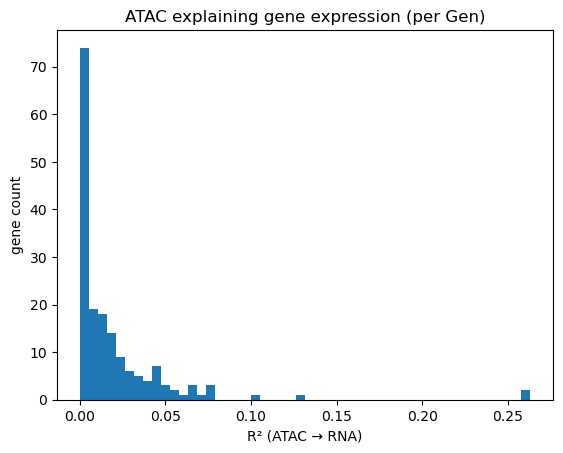

In [100]:
plt.hist(r2_per_gene.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression (per Gen)")
plt.savefig("figures/Histogram_regression_all_celltypes", dpi=300, bbox_inches='tight')
plt.show()


Most genes have R² ≈ 0
-> ATAC data explains almost none of their expression levels across cell types

some genes gave R² > 0.05
-> moderate correlation between ATAC signal and RNA expression.

few R² > 0.1
-> chromatin accessibility seems to have a stronger predictive value

### b) How do the coefficients differ when it is performed on your cell lineage alone?

In [83]:
RNA_Bcells_reg = RNA_reg.iloc[:, :22]
RNA_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,1.096732e+09,1.096732e+09,1.021750e+09,1.021812e+08,1.205236e+09,1.326780e+09,1.392996e+09,1.821243e+09,1.025543e+09,3.383058e+09,...,1.024819e+09,1.026268e+09,1.583160e+08,2.031568e+09,1.023171e+09,1.402182e+09,1.600163e+09,1.024314e+09,1.026847e+08,1.022363e+09
0610007P14Rik,2.060540e+09,2.461053e+09,1.924246e+09,2.042984e+09,1.897592e+09,2.101952e+09,1.802194e+09,1.378025e+09,1.394367e+09,1.383350e+09,...,1.716164e+09,1.600866e+09,1.955181e+09,1.772962e+09,1.336412e+09,1.597273e+09,2.087017e+09,1.700951e+09,1.685336e+09,2.597576e+09
0610009B22Rik,7.827206e+09,7.883703e+09,6.884475e+09,7.641817e+09,1.060856e+09,7.750282e+09,6.821309e+09,5.722443e+08,5.678749e+09,4.046051e+09,...,4.111211e+09,3.555379e+09,4.965223e+09,3.440006e+09,2.355237e+09,6.277780e+09,3.567404e+08,7.266522e+09,1.058590e+09,5.673231e+09
0610009L18Rik,8.577159e+08,1.679139e+09,1.551155e+08,1.694735e+09,1.058370e+09,8.664784e+09,2.878172e+09,8.952120e+09,1.187398e+09,1.672197e+09,...,1.262049e+09,9.932675e+09,1.772576e+09,1.486780e+09,1.288333e+09,1.258652e+09,1.049192e+09,1.823690e+09,3.481406e+09,3.253803e+09
0610009O20Rik,1.686459e+08,1.579260e+09,1.559416e+09,1.862615e+09,1.625846e+09,1.520880e+09,1.630723e+09,1.331161e+09,8.805298e+09,8.740848e+09,...,1.189818e+09,9.724672e+09,1.261602e+09,9.847901e+09,1.032534e+09,9.527705e+09,1.034411e+09,9.217649e+09,1.173169e+09,6.144418e+09


In [84]:
RNA_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17535 entries, 0610005C13Rik to l7Rn6
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   17535 non-null  float64
 1   LTHSC.34+.BM   17535 non-null  float64
 2   STHSC.150-.BM  17535 non-null  float64
 3   MPP4.135+.BM   17535 non-null  float64
 4   proB.CLP.BM    17535 non-null  float64
 5   proB.FrA.BM    17535 non-null  float64
 6   proB.FrBC.BM   17535 non-null  float64
 7   B.FrE.BM       17535 non-null  float64
 8   B1b.PC         17535 non-null  float64
 9   B.T1.Sp        17535 non-null  float64
 10  B.T2.Sp        17535 non-null  float64
 11  B.T3.Sp        17535 non-null  float64
 12  B.Sp           17535 non-null  float64
 13  B.Fem.Sp       17535 non-null  float64
 14  B.MZ.Sp        17535 non-null  float64
 15  B.Fo.Sp        17535 non-null  float64
 16  B.mem.Sp       17535 non-null  float64
 17  B.GC.CB.Sp     17535 non-null  float64
 18 

In [87]:
ATAC_Bcells_reg = ATAC_reg.iloc[:, :22]
ATAC_Bcells_reg.head()

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,B.FrE.BM,B1b.PC,B.T1.Sp,...,B.Sp,B.Fem.Sp,B.MZ.Sp,B.Fo.Sp,B.mem.Sp,B.GC.CB.Sp,B.GC.CC.Sp,B.PB.Sp,B.PC.Sp,B.PC.BM
Gene,,,,,,,,,,,,,,,,,,,,,
0610005C13RIK,7582.118958,13444.338542,16676.248229,13136.175000,16543.082500,18684.885625,19950.962604,24212.743229,16774.334583,19109.247813,...,23372.873333,22444.829479,23700.658854,22376.373125,17288.464479,20204.028021,16953.070625,15964.500000,18870.935833,20732.708125
0610007P14RIK,5663.187609,11372.126522,13942.612391,11375.388478,11489.378478,14811.509348,18442.223478,14534.735435,17633.056087,17757.893696,...,24529.115000,23980.503696,17779.813696,23430.040652,21238.883913,22487.122174,17825.783696,22342.459565,20251.474783,20769.206739
0610009B22RIK,5429.216986,15361.065890,14648.617945,16991.953699,16871.772192,16894.832192,18141.010137,16157.725616,16823.230548,18985.048493,...,19530.388493,21472.630000,24738.883288,18723.497534,19206.245068,23910.852329,20569.606712,21890.689589,19512.566027,23899.430411
0610009L18RIK,6624.227978,18129.787416,14829.637978,16676.543371,18607.434045,17636.482022,20049.521798,21275.034831,16747.282921,21061.533708,...,24144.219438,25509.633258,24414.982809,23845.919101,20246.081910,20331.991573,16454.872697,20242.547865,23708.665393,24497.566517
0610009O20RIK,7045.009140,15934.586989,13911.758925,16450.166237,18663.273548,19825.165269,20092.491075,18851.673548,16173.282903,16852.479892,...,23459.192581,24788.210753,24351.983656,27370.966344,20995.401935,22506.951075,16968.809140,21981.401935,22894.020108,26171.513871


In [88]:
ATAC_Bcells_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0610005C13RIK to ZZZ3
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LTHSC.34-.BM   23873 non-null  float64
 1   LTHSC.34+.BM   23873 non-null  float64
 2   STHSC.150-.BM  23873 non-null  float64
 3   MPP4.135+.BM   23873 non-null  float64
 4   proB.CLP.BM    23873 non-null  float64
 5   proB.FrA.BM    23873 non-null  float64
 6   proB.FrBC.BM   23873 non-null  float64
 7   B.FrE.BM       23873 non-null  float64
 8   B1b.PC         23873 non-null  float64
 9   B.T1.Sp        23873 non-null  float64
 10  B.T2.Sp        23873 non-null  float64
 11  B.T3.Sp        23873 non-null  float64
 12  B.Sp           23873 non-null  float64
 13  B.Fem.Sp       23873 non-null  float64
 14  B.MZ.Sp        23873 non-null  float64
 15  B.Fo.Sp        23873 non-null  float64
 16  B.mem.Sp       23873 non-null  float64
 17  B.GC.CB.Sp     23873 non-null  float64
 18  

In [ ]:
shared_genes = RNA_Bcells_reg.index.intersection(ATAC_Bcells_reg.index)
print(f"{len(shared_genes)} shared genes.")

173 shared genes.


In [97]:
#celltypes 
common_celltypes_Bcells = RNA_Bcells_reg.columns.intersection(ATAC_Bcells_reg.columns)

In [98]:
r2_per_gene_Bcells = {}

for gene in shared_genes:
    x_vals = ATAC_Bcells_reg.loc[gene, common_celltypes_Bcells].values
    y_vals = RNA_Bcells_reg.loc[gene, common_celltypes_Bcells].values

    if np.isnan(x_vals).any() or np.isnan(y_vals).any():
        continue

    model = LinearRegression()
    model.fit(x_vals.reshape(-1, 1), y_vals)
    r2 = r2_score(y_vals, model.predict(x_vals.reshape(-1, 1)))
    r2_per_gene_Bcells[gene] = r2

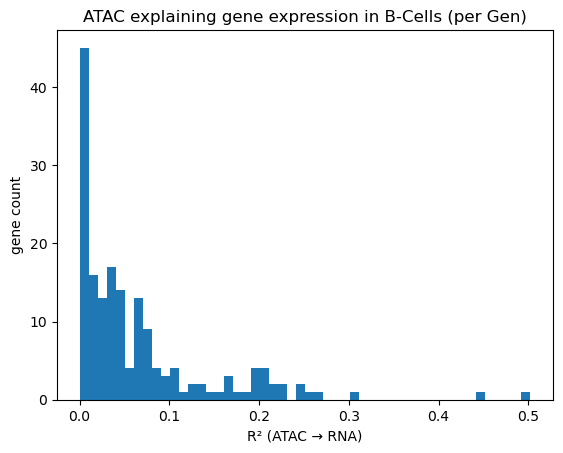

In [101]:
plt.hist(r2_per_gene_Bcells.values(), bins=50)
plt.xlabel("R² (ATAC → RNA)")
plt.ylabel("gene count")
plt.title("ATAC explaining gene expression in B-Cells (per Gen)")
plt.savefig("figures/Histogram_regression_Bcells", dpi=300, bbox_inches='tight')
plt.show()


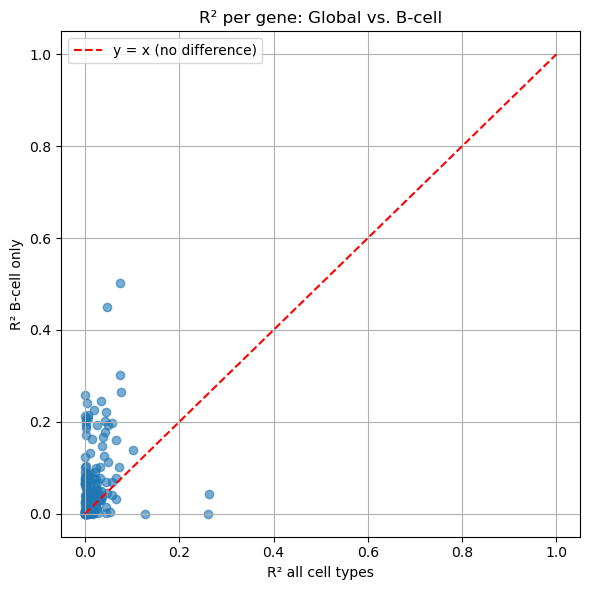

In [116]:
#compare coefficients 
shared_genes_all = set(r2_per_gene_Bcells).intersection(set(r2_per_gene))

x = [r2_per_gene[gene] for gene in shared_genes_all]
y = [r2_per_gene_Bcells[gene] for gene in shared_genes_all]

plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', label='y = x (no difference)')
plt.xlabel("R² all cell types")
plt.ylabel("R² B-cell only")
plt.title("R² per gene: Global vs. B-cell")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/R^2_per_gene", dpi=300, bbox_inches='tight')
plt.show()

In [104]:
delta_r2 = np.array(y) - np.array(x)
print(f"Mean ΔR² (B-cell - Global): {np.mean(delta_r2):.4f}")

Mean ΔR² (B-cell - Global): 0.0453


mean ΔR²: 0.0453
-> chromatin accessibility in B-cells explains gene expression better than the global model across all cell types
-> gene regulation via chromatin structure is (partly) B-cell-specific
-> lineage-restricted regulatory mechanisms

### c) Which CREs control your cell lineage specific genes?

In [106]:
#B-Cell specific genes -> with high delta R^2 

delta_r2 = {gene: r2_per_gene_Bcells[gene] - r2_per_gene[gene]for gene in r2_per_gene_Bcells if gene in r2_per_gene}
bcell_specific_genes = [gene for gene, delta in delta_r2.items() if delta > 0.1]

print(f"{len(bcell_specific_genes)} B-cell-specific genes with ΔR² > 0.1")


29 B-cell-specific genes with ΔR² > 0.1


In [ ]:
atac_cre_activity = ATAC_Bcells_reg.loc[bcell_specific_genes]

mean_atac_per_gene = atac_cre_activity.mean(axis=1)
top_CREs = mean_atac_per_gene.sort_values(ascending=False).head(10)

print("Top CREs controlling B-cell-specific genes:")
print(top_CREs)

Top CREs controlling B-cell-specific genes:
Gene
H19            22428.460646
AI413582       21255.428906
H13            21173.380569
AI661453       20434.469473
H2-T24         19786.835019
AI837181       19708.573825
D17H6S56E-5    19672.325037
BC031181       19360.097510
AU022252       18892.500493
BC094916       18800.470341
dtype: float64


In [113]:
all_CREs = mean_atac_per_gene.sort_values(ascending=False).head(29)
print(mean_atac_per_gene)

Gene
A630020A06      14993.508482
AI413582        21255.428906
AI414108        16766.836472
AI427809        17567.665624
AI450353        15128.829379
AI661453        20434.469473
AI662270        14988.044523
AI837181        19708.573825
AU022252        18892.500493
AU041133        15398.163545
AW146154        16172.080303
BC005624        18602.139287
BC018473        17150.749098
BC021767        17664.694886
BC030499        18727.430723
BC031181        19360.097510
BC037704        18555.021062
BC048546        16596.932019
BC049762        18082.425658
BC068281        18617.339893
BC094916        18800.470341
D17H6S56E-5     19672.325037
F5              18794.825024
H13             21173.380569
H19             22428.460646
H2-M9           16444.750057
H2-Q1           18070.541549
H2-T24          19786.835019
LOC105242399     2576.490000
dtype: float64


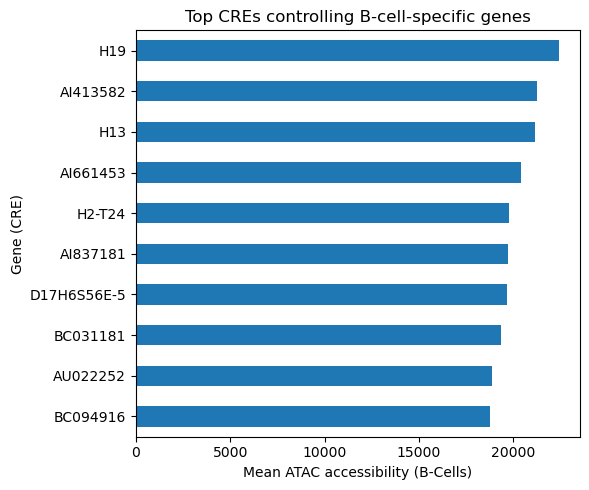

In [120]:
#only for tio CRES
top_CREs.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene (CRE)")
plt.title("Top CREs controlling B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

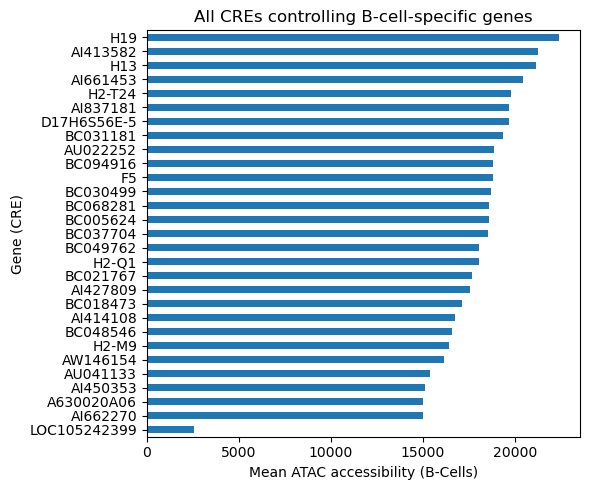

In [121]:
# for all B-Cell-CRES
all_CREs.plot(kind='barh', figsize=(6,5))
plt.xlabel("Mean ATAC accessibility (B-Cells)")
plt.ylabel("Gene (CRE)")
plt.title("All CREs controlling B-cell-specific genes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/ATAC_signal_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

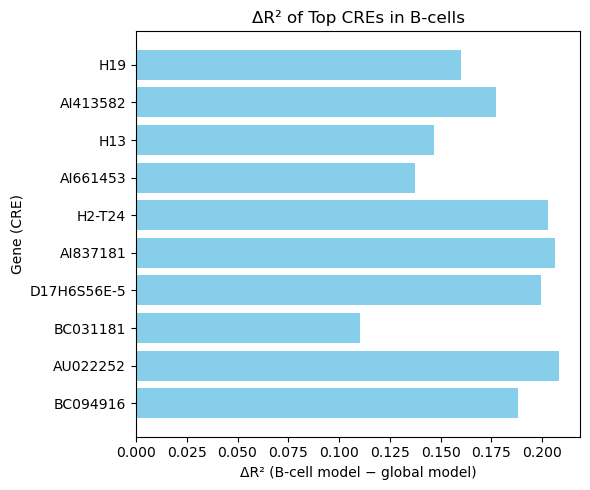

In [122]:
top_cre_genes = top_CREs.index.tolist()
delta_r2_top_cre = [delta_r2[gene] for gene in top_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(top_cre_genes, delta_r2_top_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene (CRE)")
plt.title("ΔR² of Top CREs in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_top_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

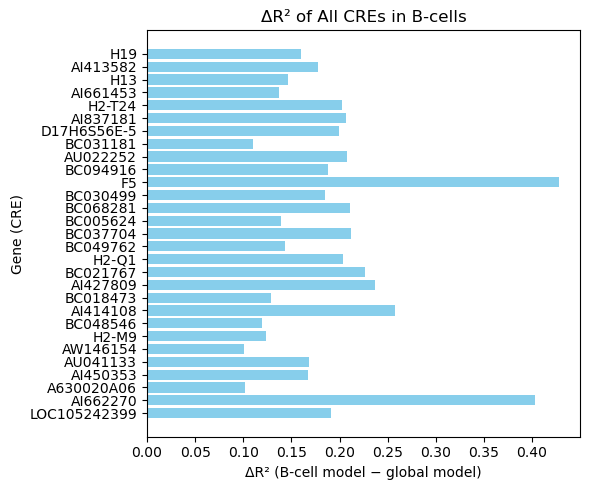

In [126]:
all_cre_genes = all_CREs.index.tolist()
delta_r2_all_cre = [delta_r2[gene] for gene in all_cre_genes]

plt.figure(figsize=(6, 5))
plt.barh(all_cre_genes, delta_r2_all_cre, color="skyblue")
plt.xlabel("ΔR² (B-cell model − global model)")
plt.ylabel("Gene (CRE)")
plt.title("ΔR² of All CREs in B-cells")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/deltaR^2_all_CREs_Bcells", dpi=300, bbox_inches='tight')
plt.show()

 -hight delta R^2
 -> In B-cells: Genexpression correlates strongly with Chromatin-accesibility
-> other celltypes: correlation is weaker

### d) How do the results of this analysis differ from pure association via correlation?

### e) Are there differences between activating and repressing CREs?

### f) How many genes are mainly regulated by repressing CREs, and can promoters act through repression?

### g) Where are repressing CREs located compared to activating CREs?

### h) Are there CREs that are repressing for one gene but activating for another gene?
            

### i) Does CRE clustering change if one includes the effect direction on gene expression?